# Examples for CSCI632 Lecture 14: Gaussian Discriminant Analysis

In [13]:
from IPython.display import display, Math

# Converts a numpy array to a LaTeX matrix
def latex_matrix(matrix):
    latex_str = r'\begin{bmatrix}'
    for row in matrix:
        latex_str += ' & '.join(map(str, row)) + r' \\'
    latex_str += r'\end{bmatrix}'
    return latex_str

def print_matrix(matrix):
    display(Math(latex_matrix(matrix)))


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gauss_1d(mu, sigma):
    # Create a range of x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

    # Compute the Gaussian probability density function (PDF)
    pdf = (1/(np.sqrt(2 * np.pi * sigma**2))) * np.exp(- (x - mu)**2 / (2 * sigma**2))

    # Plot the Gaussian distribution
    plt.plot(x, pdf, label=f'Gaussian: $\mu$={mu}, $\sigma$={sigma}')
    plt.title('1D Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()
    plt.show()


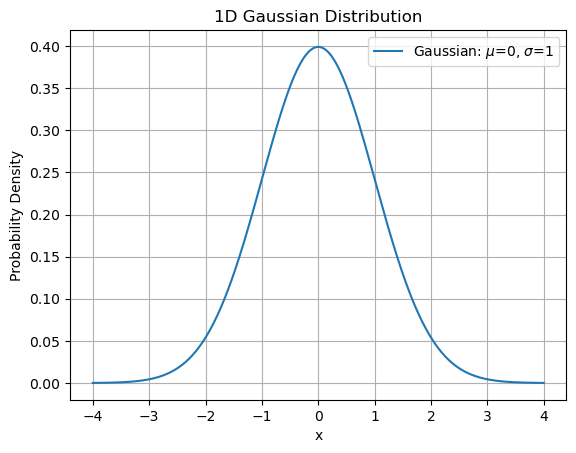

In [3]:
plot_gauss_1d(0, 1)

In [26]:
from scipy.stats import multivariate_normal

def plot_2d_gaussian(mu, sigma):
    """
    Plots a 2D Gaussian distribution as a 3d plot given a mean vector and a covariance matrix.
    
    Parameters:
    - mu: Mean vector of size 2 (list or numpy array)
    - sigma: 2x2 Covariance matrix (numpy array)
    """
    # Create a grid of points over which to evaluate the Gaussian
    x, y = np.meshgrid(np.linspace(mu[0] - 3*np.sqrt(sigma[0, 0]), mu[0] + 3*np.sqrt(sigma[0, 0]), 100),
                       np.linspace(mu[1] - 3*np.sqrt(sigma[1, 1]), mu[1] + 3*np.sqrt(sigma[1, 1]), 100))
    pos = np.dstack((x, y))

    # Create a 2D Gaussian based on the mean and covariance
    rv = multivariate_normal(mu, sigma)
    z = rv.pdf(pos)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    # Set plot labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Probability Density')
    ax.set_title('3D Gaussian Distribution')

    plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

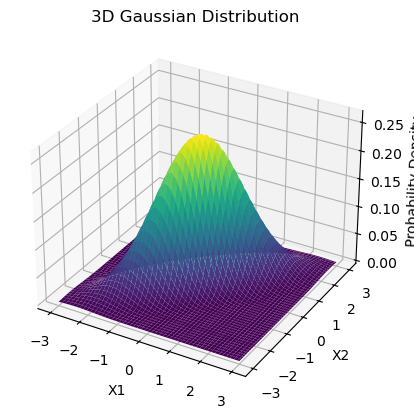

In [43]:
mu = [0, 0]
mum = np.array([mu]).T   # mu as column matrix.
sigma = np.array([[1,.8],[.8,1]])

display(Math("\mathbf{\mu}=" + latex_matrix(mum)))
display(Math(f"$\\Sigma={latex_matrix(sigma)}"))
plot_2d_gaussian(mu, sigma)

In [32]:
from scipy.stats import multivariate_normal
def contour_2d_gaussian(mu, sigma):
    """
    Plots a 2D Gaussian distribution given a mean vector and a covariance matrix.

    Parameters:
    - mu: Mean vector of size 2 (list or numpy array)
    - sigma: 2x2 Covariance matrix (numpy array)
    """
    # Create a grid of points over which to evaluate the Gaussian
    x, y = np.meshgrid(np.linspace(mu[0] - 3*np.sqrt(sigma[0, 0]), mu[0] + 3*np.sqrt(sigma[0, 0]), 100),
                       np.linspace(mu[1] - 3*np.sqrt(sigma[1, 1]), mu[1] + 3*np.sqrt(sigma[1, 1]), 100))
    pos = np.dstack((x, y))

    # Create a 2D Gaussian based on the mean and covariance
    rv = multivariate_normal(mu, sigma)

    # Plot the Gaussian distribution as a contour plot
    plt.contourf(x, y, rv.pdf(pos), levels=20, cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.title('2D Gaussian Distribution')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()


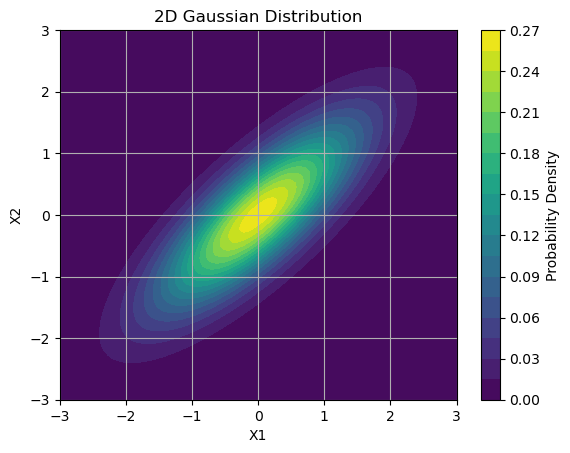

In [45]:
contour_2d_gaussian(mu, sigma)



$$\Sigma = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^\top
